# Introduction

In 2005, the credit card issuer  in Taiwan faced
the cash and credit card debt crisis and the delinquency is
expected to peak in the third quarter of 2006. In order to increase market share, card-issuing
banks in Taiwan over-issued cash and credit cards to
unqualified applicants. At the same time, most cardholders,
irrespective of their repayment ability, overused credit card
for consumption and accumulated heavy credit and cash–
card debts. The crisis caused the blow to consumer finance
confidence and it is a big challenge for both banks and
cardholders.

The objectives of this work are as follows:  
1. To explore credit cardholder issuer data based on transaction history.  
2. To analyze how the probability of default payment varies across different demographic categories.  
3. To identify the strongest predictors of default payment.

The source of this data is:
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

and the source of this project originates from the following paper:

https://bradzzz.gitbooks.io/ga-dsi-seattle/content/dsi/dsi_05_classification_databases/2.1-lesson/assets/datasets/DefaultCreditCardClients_yeh_2009.pdf

# Data Pre-processing

## Import Dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
!pip install tabulate==0.8.10

  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.21.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


## Import Dataset

In [3]:
# get the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/Credit Card Default Analysis/Scripts/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


There are 25 variables:

*   **ID**: ID of each client
*   **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
*   **SEX**: Gender (1=male, 2=female)
*   **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*   **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
*   **AGE**: Age in years
*   **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   **PAY_2**: Repayment status in August, 2005 (scale same as above)
*   **PAY_3**: Repayment status in July, 2005 (scale same as above)
*   **PAY_4**: Repayment status in June, 2005 (scale same as above)
*   **PAY_5**: Repayment status in May, 2005 (scale same as above)
*   **PAY_6**: Repayment status in April, 2005 (scale same as above)
*   **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
*   **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
*   **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
*   **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
*   **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
*   **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
*   **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
*   **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
*   **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
*   **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
*   **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
*   **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
*   **default.payment.next.month**: Default payment (1=yes, 0=no)
















## Data Cleaning

In [5]:
for col in ['MARRIAGE', 'EDUCATION', 'SEX']:
  print(f'All the values from column {col}: {df[col].unique()}\n')

All the values from column MARRIAGE: [1 2 3 0]

All the values from column EDUCATION: [2 1 3 5 4 6 0]

All the values from column SEX: [2 1]



Adjust values in some parameters to get better explanation

In [6]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['SEX'] = df['SEX'].replace(0, 3)

In [7]:
for col in ['MARRIAGE', 'EDUCATION', 'SEX']:
  print(f'After adjustment from column {col}: {df[col].unique()}\n')

After adjustment from column MARRIAGE: [1 2 3]

After adjustment from column EDUCATION: [2 1 3 4]

After adjustment from column SEX: [2 1]



In [8]:
df = df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'def_status'})

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
eda = df.copy()
eda.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In this step, I will seperate from data that uses to exploration and modeling. df for modeling and eda for exploration data analysis

In [10]:
nRow1, nCol1 = df.shape
nRow2, nCol2 = eda.shape
print(f'There are {nRow1} rows and {nCol1} columns in df dataset')
print(f'There are {nRow2} rows and {nCol2} columns in eda dataset')

There are 30000 rows and 25 columns in df dataset
There are 30000 rows and 25 columns in eda dataset


In [11]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe().T

,count,mean,std,min,25%,50%,75%,max
SEX,30000.0,1.603733,0.489129,1.0,1.0,2.0,2.0,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.0,2.0,2.0,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.0,2.0,2.0,3.0


In [12]:
# Payment delay description
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.0,0.0,0.0,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.0,0.0,0.0,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.0,0.0,0.0,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.0,0.0,0.0,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.0,0.0,0.0,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.0,0.0,0.0,8.0


The variables above represent categorical values rather than numerical ones; therefore, a more detailed explanation of these categories is necessary.

In [13]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0


In [14]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_AMT3,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_AMT4,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0
PAY_AMT5,30000.0,4799.387633,15278.305679,0.0,252.50,1500.0,4031.50,426529.0
PAY_AMT6,30000.0,5215.502567,17777.465775,0.0,117.75,1500.0,4000.00,528666.0


In [15]:
lb = df.LIMIT_BAL.describe().T
defs = df.def_status.describe().T

print(f'Limit Balance:\n{lb}\n')
print(f'Default Status:\n{defs}')

Limit Balance:
count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Default Status:
count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_status, dtype: float64


# Exploratory Data Analysis

In [16]:
from tabulate import tabulate

pay = pd.concat([eda[col].value_counts().sort_index() for col in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']],
          axis=1, keys=['Sept', 'Aug', 'Jul', 'Jun', 'May', 'Apr']).fillna(0).astype('Int64')

pay = pay.rename(index={-2: 'prepayment', -1: 'pay duly', 0: 'grace period'})

print(tabulate(pay, headers='keys', tablefmt='psql'))

+--------------+--------+-------+-------+-------+-------+-------+
|              |   Sept |   Aug |   Jul |   Jun |   May |   Apr |
|--------------+--------+-------+-------+-------+-------+-------|
| prepayment   |   2759 |  3782 |  4085 |  4348 |  4546 |  4895 |
| pay duly     |   5686 |  6050 |  5938 |  5687 |  5539 |  5740 |
| grace period |  14737 | 15730 | 15764 | 16455 | 16947 | 16286 |
| 1            |   3688 |    28 |     4 |     2 |     0 |     0 |
| 2            |   2667 |  3927 |  3819 |  3159 |  2626 |  2766 |
| 3            |    322 |   326 |   240 |   180 |   178 |   184 |
| 4            |     76 |    99 |    76 |    69 |    84 |    49 |
| 5            |     26 |    25 |    21 |    35 |    17 |    13 |
| 6            |     11 |    12 |    23 |     5 |     4 |    19 |
| 7            |      9 |    20 |    27 |    58 |    58 |    46 |
| 8            |     19 |     1 |     3 |     2 |     1 |     2 |
+--------------+--------+-------+-------+-------+-------+-------+


In [17]:
print("Analysis of Payment Delay from April to September:")
print("--------------------------------------------------")

# Analyze the trend of payment delays over the months.
for i in range(1, 7):  # Iterate through PAY_1 to PAY_6
  pay_col = f"PAY_{i}"
  delayed_payments = eda[eda[pay_col] > 0][pay_col].count()
  total_payments = eda[pay_col].count()
  delay_percentage = (delayed_payments / total_payments) * 100
  print(f"Month {7-i}: {delayed_payments} delayed payments out of {total_payments} total payments ({delay_percentage:.2f}%).")

# Look for any specific patterns or anomalies in the data
# (e.g., a sudden increase in delayed payments in a specific month).

# Analyze the distribution of payment delay categories.
print("\nDistribution of Payment Delay Categories:")
for i in range(1, 7):  # Iterate through PAY_1 to PAY_6
  pay_col = f"PAY_{i}"
  print(f"Month {7 - i}:")
  print(eda[pay_col].value_counts().sort_index())
  print("---")


Analysis of Payment Delay from April to September:
--------------------------------------------------
Month 6: 6818 delayed payments out of 30000 total payments (22.73%).
Month 5: 4438 delayed payments out of 30000 total payments (14.79%).
Month 4: 4213 delayed payments out of 30000 total payments (14.04%).
Month 3: 3510 delayed payments out of 30000 total payments (11.70%).
Month 2: 2968 delayed payments out of 30000 total payments (9.89%).
Month 1: 3079 delayed payments out of 30000 total payments (10.26%).

Distribution of Payment Delay Categories:
Month 6:
PAY_1
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64
---
Month 5:
PAY_2
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64
---
Month 4:
PAY_3
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 

## Gender analysis

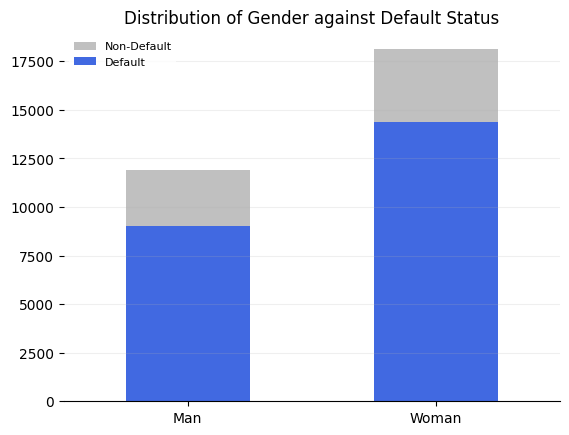

In [18]:
sex_def_status = eda.groupby(['SEX', 'def_status'])['SEX'].count().unstack()

# Mengubah label 1 dan 2
sex_def_status = sex_def_status.rename(index={1: 'Man', 2: 'Woman'})

# Membuat stacked bar chart dengan warna yang diinginkan (dibalik)
ax = sex_def_status.plot(kind='bar', stacked=True, color={0: 'royalblue', 1: '#C0C0C0'}) # 0: non-default (lightblue), 1: default (grey)

# Menghilangkan label sumbu x dan y
plt.xlabel("")  # Mengosongkan label sumbu x
plt.ylabel("")  # Mengosongkan label sumbu y
plt.title('Distribution of Gender against Default Status')

# Mengubah label sumbu x (Man dan Woman) menjadi horizontal, mengatur ukuran, dan fontsize
plt.xticks(rotation=0, ha='center', fontsize=10)  # Mengubah fontsize menjadi 10

# Mengubah definisi legend, warna, dan pengaturan lainnya
handles, labels = ax.get_legend_handles_labels()
labels = ['Default', 'Non-Default']  # Diubah urutannya agar sesuai dengan warna
legend = ax.legend(handles[::-1], labels[::-1], fontsize=8, loc='best')  # Membalik urutan handles dan labels

# Membuat kotak legend menjadi seamless
legend.get_frame().set_linewidth(0.0)  # Mengatur ketebalan garis border menjadi 0

# Menyembunyikan spine (garis tepi) dari axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# Menghilangkan y-axis yang menunjukkan skala
ax.get_yaxis().set_visible(True)


plt.grid(axis='y', alpha=0.2)

plt.show()

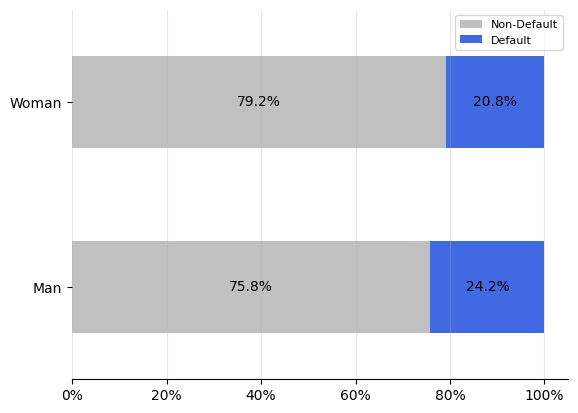

In [19]:

# Group data by sex and default status and count occurrences
sex_default_counts = df.groupby(['SEX', 'def_status'])['SEX'].count().unstack()

# Rename labels for better clarity
sex_default_counts = sex_default_counts.rename(index={1: 'Man', 2: 'Woman'})

# Calculate percentages within each sex
sex_default_percentages = sex_default_counts.div(sex_default_counts.sum(axis=1), axis=0) * 100

# Create horizontal stacked bar chart with percentages
ax = sex_default_percentages.plot(kind='barh', stacked=True, color=['#C0C0C0', 'royalblue'])

# Set title and labels
# plt.title('Distribution of Default Status by Sex (Percentage)')
plt.xlabel('')
plt.ylabel('')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Non-Default', 'Default']
ax.legend(handles, labels, fontsize=8, loc='best')

legend.get_frame().set_linewidth(0.0)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False) # Remove left spine

# Add grid
plt.grid(axis='x', alpha=0.3)

# Add percentage sign to x-axis labels
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Show percentage labels inside bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color='black')

plt.show()

In [20]:
sex_def_status = eda.groupby(['SEX', 'def_status'])['SEX'].count().unstack()
sex_def_status = sex_def_status.rename(index={1: 'Man', 2: 'Woman'})

total_man = sex_def_status.loc['Man'].sum()
total_woman = sex_def_status.loc['Woman'].sum()

sex_def_status['Total'] = sex_def_status[0] + sex_def_status[1]
sex_def_status['Default_Percentage'] = (sex_def_status[1] / sex_def_status['Total']) * 100
sex_def_status['Non_Default_Percentage'] = (sex_def_status[0] / sex_def_status['Total']) * 100


print(tabulate(sex_def_status, headers='keys', tablefmt='psql'))


+-------+-------+------+---------+----------------------+--------------------------+
| SEX   |     0 |    1 |   Total |   Default_Percentage |   Non_Default_Percentage |
|-------+-------+------+---------+----------------------+--------------------------|
| Man   |  9015 | 2873 |   11888 |              24.1672 |                  75.8328 |
| Woman | 14349 | 3763 |   18112 |              20.7763 |                  79.2237 |
+-------+-------+------+---------+----------------------+--------------------------+


### Gender with education

In [21]:
# Filter data for men who defaulted
men_default = df[(df['SEX'] == 1) & (df['def_status'] == 1)]

# Group by education and count occurrences for men who defaulted
men_default_education = men_default.groupby('EDUCATION')['EDUCATION'].count()

# Calculate the percentage of men who defaulted by education
total_men_default = men_default.shape[0]
men_default_education_percentage = (men_default_education / total_men_default) * 100

# Find the education level with the highest number of defaults for men
highest_default_education_men = men_default_education_percentage.idxmax()
highest_default_percentage_men = men_default_education_percentage.max()

print(f"For men who defaulted, the education level with the highest number of defaults is {highest_default_education_men} with a percentage of {highest_default_percentage_men:.2f}%")

# Filter data for women who defaulted
women_default = df[(df['SEX'] == 2) & (df['def_status'] == 1)]

# Group by education and count occurrences for women who defaulted
women_default_education = women_default.groupby('EDUCATION')['EDUCATION'].count()

# Calculate the percentage of women who defaulted by education
total_women_default = women_default.shape[0]
women_default_education_percentage = (women_default_education / total_women_default) * 100

# Find the education level with the highest number of defaults for women
highest_default_education_women = women_default_education_percentage.idxmax()
highest_default_percentage_women = women_default_education_percentage.max()

print(f"For women who defaulted, the education level with the highest number of defaults is {highest_default_education_women} with a percentage of {highest_default_percentage_women:.2f}%")


For men who defaulted, the education level with the highest number of defaults is 2 with a percentage of 49.01%
For women who defaulted, the education level with the highest number of defaults is 2 with a percentage of 51.08%


### Gender with marriage

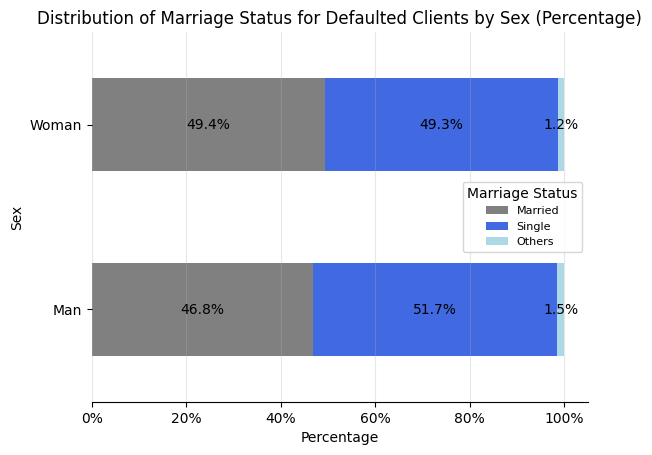

In [22]:
# Filter data for defaulted clients
defaulted = eda[eda['def_status'] == 1]

# Group defaulted data by sex and marriage status and count occurrences
sex_marriage_default_counts = defaulted.groupby(['SEX', 'MARRIAGE'])['SEX'].count().unstack()

# Rename labels for better clarity
sex_marriage_default_counts = sex_marriage_default_counts.rename(
    index={1: 'Man', 2: 'Woman'},
    columns={1: 'Married', 2: 'Single', 3: 'Others'}
)

# Calculate percentages within each sex
sex_marriage_default_percentages = sex_marriage_default_counts.div(sex_marriage_default_counts.sum(axis=1), axis=0) * 100

# Create horizontal stacked bar chart with percentages
ax = sex_marriage_default_percentages.plot(kind='barh', stacked=True, color=['grey', 'royalblue', 'lightblue'])

# Set title and labels
plt.title('Distribution of Marriage Status for Defaulted Clients by Sex (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Sex')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Marriage Status', fontsize=8)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Add grid
plt.grid(axis='x', alpha=0.3)

# Show percentage labels inside bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if width > 0:
        ax.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color='black')

# Add percentage sign to x-axis labels
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.show()

### Gender with age group

In [23]:
# prompt: saya ingin membuat kolom baru dengan nama age_group yang melakukan grouping dari kolom AGE menjadi kelompok berikut: 21-30, 31-40, 41-50, 50+

import pandas as pd
# Create a new column 'age_group' based on the 'AGE' column
bins = [20, 30, 40, 50, float('inf')]
labels = ['21-30', '31-40', '41-50', '50+']
eda['age_group'] = pd.cut(eda['AGE'], bins=bins, labels=labels, right=True)

# Print the updated DataFrame with the new 'age_group' column
print(eda[['AGE', 'age_group']].head())


   AGE age_group
0   24     21-30
1   26     21-30
2   34     31-40
3   37     31-40
4   57       50+


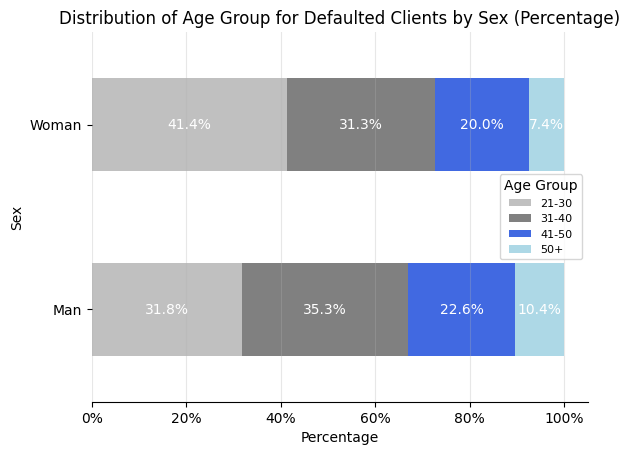

In [24]:
# Filter data for defaulted clients
defaulted = eda[eda['def_status'] == 1]

# Group defaulted data by sex and age group and count occurrences
sex_age_default_counts = defaulted.groupby(['SEX', 'age_group'])['SEX'].count().unstack()

# Rename labels for better clarity
sex_age_default_counts = sex_age_default_counts.rename(index={1: 'Man', 2: 'Woman'})

# Calculate percentages within each sex
sex_age_default_percentages = sex_age_default_counts.div(sex_age_default_counts.sum(axis=1), axis=0) * 100

# Create horizontal stacked bar chart with percentages
ax = sex_age_default_percentages.plot(kind='barh', stacked=True, color=['#C0C0C0', 'grey', 'royalblue', 'lightblue'])

# Set title and labels
plt.title('Distribution of Age Group for Defaulted Clients by Sex (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Sex')

# Customize legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Age Group', fontsize=8)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Add grid
plt.grid(axis='x', alpha=0.3)

# Show percentage labels inside bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if width > 0:
        ax.annotate(f'{width:.1f}%', (x + width/2, y + height/2), ha='center', va='center', color='white')

# Add percentage sign to x-axis labels
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.show()

## Education analysis

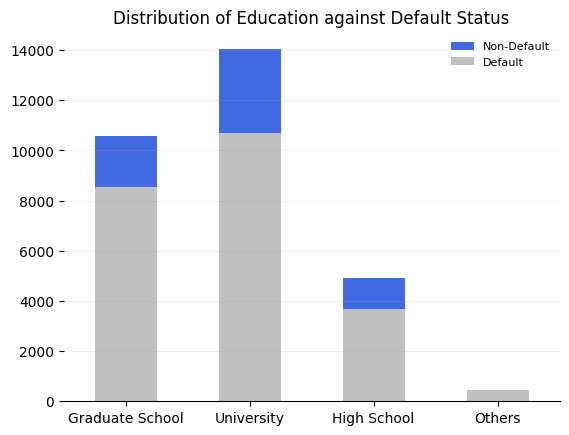

In [25]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan education dan def_status
edu_def_status = eda.groupby(['EDUCATION', 'def_status'])['EDUCATION'].count().unstack()

# Mengubah label education (opsional, sesuaikan dengan data Anda)
edu_def_status = edu_def_status.rename(index={1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})

# Membuat stacked bar chart dengan warna yang diinginkan
ax = edu_def_status.plot(kind='bar', stacked=True, color={0: '#C0C0C0', 1: 'royalblue'})

# Menghilangkan label sumbu x dan y
plt.xlabel("")  # Mengosongkan label sumbu x
plt.ylabel("")  # Mengosongkan label sumbu y
plt.title('Distribution of Education against Default Status')

# Mengubah label sumbu x (education) menjadi horizontal, mengatur ukuran, dan fontsize
plt.xticks(rotation=0, ha='center', fontsize=10)  # Mengubah fontsize menjadi 10

# Mengubah definisi legend, warna, dan pengaturan lainnya
handles, labels = ax.get_legend_handles_labels()
labels = ['Default', 'Non-Default']  # Diubah urutannya agar sesuai dengan warna
legend = ax.legend(handles[::-1], labels[::-1], fontsize=8, loc='best')  # Membalik urutan handles dan labels, fontsize 8, tanpa judul

# Membuat kotak legend menjadi seamless
legend.get_frame().set_linewidth(0.0)  # Mengatur ketebalan garis border menjadi 0

# Menyembunyikan spine (garis tepi) dari axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# Menghilangkan y-axis yang menunjukkan skala
ax.get_yaxis().set_visible(True)

plt.grid(axis='y', alpha=0.2)

plt.show()

In [26]:
# Mengelompokkan data berdasarkan education dan def_status
edu_def_status = eda.groupby(['EDUCATION', 'def_status'])['EDUCATION'].count().unstack()

# Mengubah label education (opsional, sesuaikan dengan data Anda)
edu_def_status = edu_def_status.rename(index={1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})

# Menghitung total untuk setiap level education
edu_def_status['Total'] = edu_def_status[0] + edu_def_status[1]

# Menghitung persentase default untuk setiap level education
edu_def_status['Default_Percentage'] = (edu_def_status[1] / edu_def_status['Total']) * 100

# Menghitung persentase non-default untuk setiap level education
edu_def_status['Non_Default_Percentage'] = (edu_def_status[0] / edu_def_status['Total']) * 100

print(tabulate(edu_def_status, headers='keys', tablefmt='psql'))


+-----------------+-------+------+---------+----------------------+--------------------------+
| EDUCATION       |     0 |    1 |   Total |   Default_Percentage |   Non_Default_Percentage |
|-----------------+-------+------+---------+----------------------+--------------------------|
| Graduate School |  8549 | 2036 |   10585 |             19.2348  |                  80.7652 |
| University      | 10700 | 3330 |   14030 |             23.7349  |                  76.2651 |
| High School     |  3680 | 1237 |    4917 |             25.1576  |                  74.8424 |
| Others          |   435 |   33 |     468 |              7.05128 |                  92.9487 |
+-----------------+-------+------+---------+----------------------+--------------------------+


## Marriage analysis

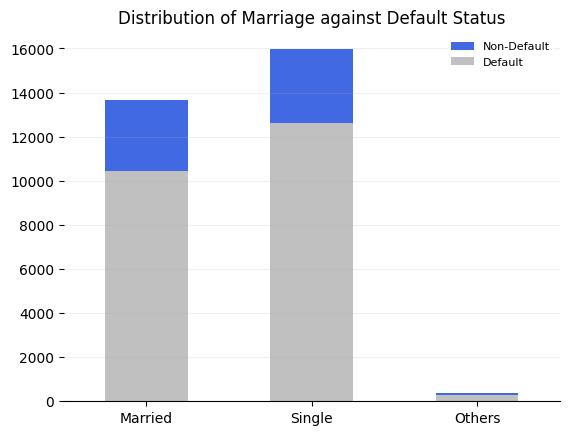

In [27]:
# Mengelompokkan data berdasarkan MARRIAGE dan def_status
marriage_def_status = eda.groupby(['MARRIAGE', 'def_status'])['MARRIAGE'].count().unstack()

# Mengubah label MARRIAGE (opsional, sesuaikan dengan data Anda)
marriage_def_status = marriage_def_status.rename(index={1: 'Married', 2: 'Single', 3: 'Others'})

# Membuat stacked bar chart dengan warna yang diinginkan
ax = marriage_def_status.plot(kind='bar', stacked=True, color={0: '#C0C0C0', 1: 'royalblue'}) # 0: non-default (khaki), 1: default (grey)

# Menghilangkan label sumbu x dan y
plt.xlabel("")  # Mengosongkan label sumbu x
plt.ylabel("")  # Mengosongkan label sumbu y
plt.title('Distribution of Marriage against Default Status')

# Mengubah label sumbu x (MARRIAGE) menjadi horizontal, mengatur ukuran, dan fontsize
plt.xticks(rotation=0, ha='center', fontsize=10)  # Mengubah fontsize menjadi 10

# Mengubah definisi legend, warna, dan pengaturan lainnya
handles, labels = ax.get_legend_handles_labels()
labels = ['Default', 'Non-Default']  # Diubah urutannya agar sesuai dengan warna
legend = ax.legend(handles[::-1], labels[::-1], fontsize=8, loc='best')  # Membalik urutan handles dan labels, fontsize 8, tanpa judul

# Membuat kotak legend menjadi seamless
legend.get_frame().set_linewidth(0.0)  # Mengatur ketebalan garis border menjadi 0

# Menyembunyikan spine (garis tepi) dari axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# Menghilangkan y-axis yang menunjukkan skala
ax.get_yaxis().set_visible(True)

plt.grid(axis='y', alpha=0.2)

plt.show()

In [28]:
# Mengelompokkan data berdasarkan MARRIAGE dan def_status
marriage_def_status = eda.groupby(['MARRIAGE', 'def_status'])['MARRIAGE'].count().unstack()

# Mengubah label MARRIAGE (opsional, sesuaikan dengan data Anda)
marriage_def_status = marriage_def_status.rename(index={1: 'Married', 2: 'Single', 3: 'Others'})

# Menghitung total untuk setiap level MARRIAGE
marriage_def_status['Total'] = marriage_def_status[0] + marriage_def_status[1]

# Menghitung persentase default untuk setiap level MARRIAGE
marriage_def_status['Default_Percentage'] = (marriage_def_status[1] / marriage_def_status['Total']) * 100

# Menghitung persentase non-default untuk setiap level MARRIAGE
marriage_def_status['Non_Default_Percentage'] = (marriage_def_status[0] / marriage_def_status['Total']) * 100

print(tabulate(marriage_def_status, headers='keys', tablefmt='psql'))


+------------+-------+------+---------+----------------------+--------------------------+
| MARRIAGE   |     0 |    1 |   Total |   Default_Percentage |   Non_Default_Percentage |
|------------+-------+------+---------+----------------------+--------------------------|
| Married    | 10453 | 3206 |   13659 |              23.4717 |                  76.5283 |
| Single     | 12623 | 3341 |   15964 |              20.9283 |                  79.0717 |
| Others     |   288 |   89 |     377 |              23.6074 |                  76.3926 |
+------------+-------+------+---------+----------------------+--------------------------+


## Age group analysis

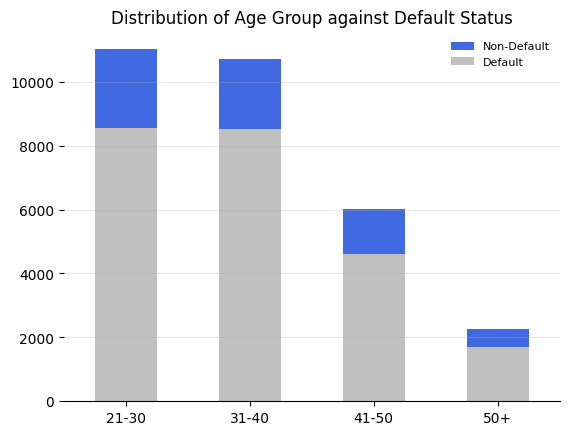

In [29]:
# Membuat kategori usia
# eda['age_group'] = pd.cut(eda['AGE'], bins=[21, 30, 40, 50, eda['AGE'].max()],
#                            labels=['21-30', '31-40', '41-50', '50+'], right=False)

# Mengelompokkan data berdasarkan age_group dan def_status
age_def_status = eda.groupby(['age_group', 'def_status'])['age_group'].count().unstack()

# Membuat stacked bar chart dengan warna yang diinginkan
ax = age_def_status.plot(kind='bar', stacked=True, color={0: '#C0C0C0', 1: 'royalblue'}) # 0: non-default (khaki), 1: default (grey)

# Menghilangkan label sumbu x dan y
plt.xlabel("")  # Mengosongkan label sumbu x
plt.ylabel("")  # Mengosongkan label sumbu y
plt.title('Distribution of Age Group against Default Status')

# Mengubah label sumbu x (age_group) menjadi horizontal, mengatur ukuran, dan fontsize
plt.xticks(rotation=0, ha='center', fontsize=10)  # Mengubah fontsize menjadi 10

# Mengubah definisi legend, warna, dan pengaturan lainnya
handles, labels = ax.get_legend_handles_labels()
labels = ['Default', 'Non-Default']  # Diubah urutannya agar sesuai dengan warna
legend = ax.legend(handles[::-1], labels[::-1], fontsize=8, loc='best')  # Membalik urutan handles dan labels, fontsize 8, tanpa judul

# Membuat kotak legend menjadi seamless
legend.get_frame().set_linewidth(0.0)  # Mengatur ketebalan garis border menjadi 0

# Menyembunyikan spine (garis tepi) dari axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# Menghilangkan y-axis yang menunjukkan skala
ax.get_yaxis().set_visible(True)

plt.grid(axis='y', alpha=0.3)

plt.show()

In [30]:
# prompt: berikan jumlah default dan non default berdasarkan age group, berikan pula percentage nya

# Mengelompokkan data berdasarkan age_group dan def_status
age_def_status = eda.groupby(['age_group', 'def_status'])['age_group'].count().unstack()

# Menghitung total untuk setiap level age_group
age_def_status['Total'] = age_def_status[0] + age_def_status[1]

# Menghitung persentase default untuk setiap level age_group
age_def_status['Default_Percentage'] = (age_def_status[1] / age_def_status['Total']) * 100

# Menghitung persentase non-default untuk setiap level age_group
age_def_status['Non_Default_Percentage'] = (age_def_status[0] / age_def_status['Total']) * 100

print(tabulate(age_def_status, headers='keys', tablefmt='psql'))


+-------------+------+------+---------+----------------------+--------------------------+
| age_group   |    0 |    1 |   Total |   Default_Percentage |   Non_Default_Percentage |
|-------------+------+------+---------+----------------------+--------------------------|
| 21-30       | 8542 | 2471 |   11013 |              22.4371 |                  77.5629 |
| 31-40       | 8524 | 2189 |   10713 |              20.4331 |                  79.5669 |
| 41-50       | 4606 | 1399 |    6005 |              23.2973 |                  76.7027 |
| 50+         | 1692 |  577 |    2269 |              25.4297 |                  74.5703 |
+-------------+------+------+---------+----------------------+--------------------------+


## Payment trend

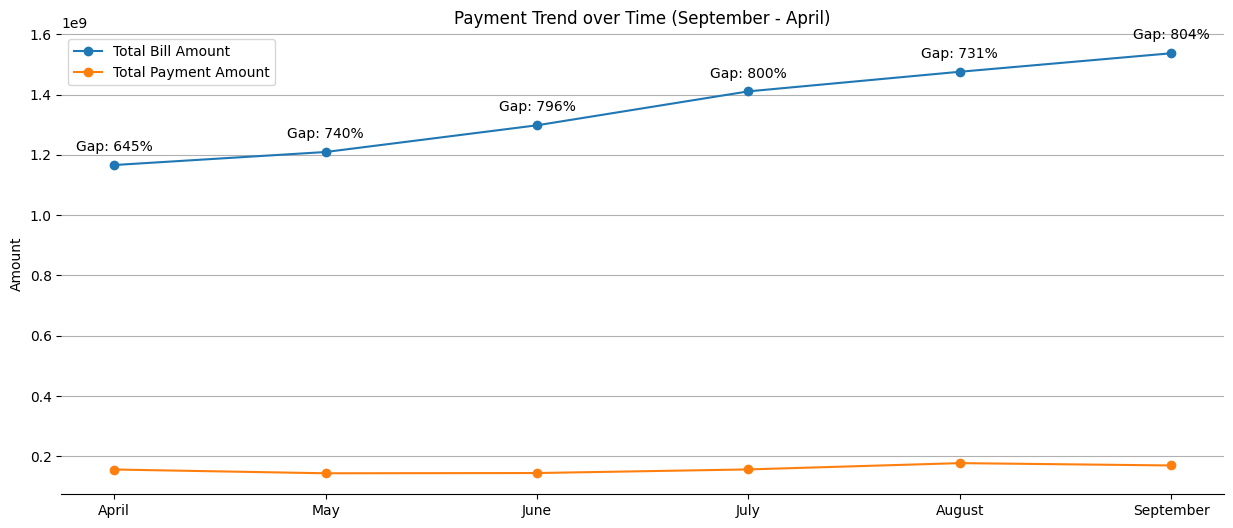

In [31]:
# Daftar kolom bill payment dan payment amount (urutan descending)
bill_cols = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']  # Urutan dibalik
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']  # Urutan dibalik
months = ['September', 'August', 'July', 'June', 'May', 'April']  # Label bulan

# Menghitung total bill payment dan payment amount untuk setiap bulan
total_bill_amt = eda[bill_cols].sum().values  # Mengambil nilai sebagai array NumPy
total_pay_amt = eda[pay_amt_cols].sum().values  # Mengambil nilai sebagai array NumPy

# Membuat DataFrame untuk visualisasi
trend_data = pd.DataFrame({
    'Month': months[::-1],  # Urutan bulan dibalik
    'Total Bill Amount': total_bill_amt,
    'Total Payment Amount': total_pay_amt
})

# Membuat line chart
plt.figure(figsize=(15, 6))
plt.plot(trend_data['Month'], trend_data['Total Bill Amount'], label='Total Bill Amount', marker='o')
plt.plot(trend_data['Month'], trend_data['Total Payment Amount'], label='Total Payment Amount', marker='o')

# Mengatur judul dan label sumbu
plt.title('Payment Trend over Time (September - April)')
plt.xlabel('')
plt.ylabel('Amount')

# Menambahkan legend
plt.legend()

# Menampilkan grid
plt.grid(axis='y')

plt.xticks(rotation=0)  # Mengatur rotasi label sumbu x

# Menghilangkan border top dan right
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# Anotasi pada selisih terbesar
for i in range(len(trend_data)):
    bill_amt = trend_data['Total Bill Amount'][i]
    pay_amt = trend_data['Total Payment Amount'][i]
    month = trend_data['Month'][i]
    if pay_amt > 0:
        percentage_difference = ((bill_amt - pay_amt) / pay_amt) * 100
        if percentage_difference > 0:  # Hanya tampilkan anotasi jika selisih positif
            plt.annotate(f"Gap: {percentage_difference:.0f}%", (month, bill_amt), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


## Payment status distribution

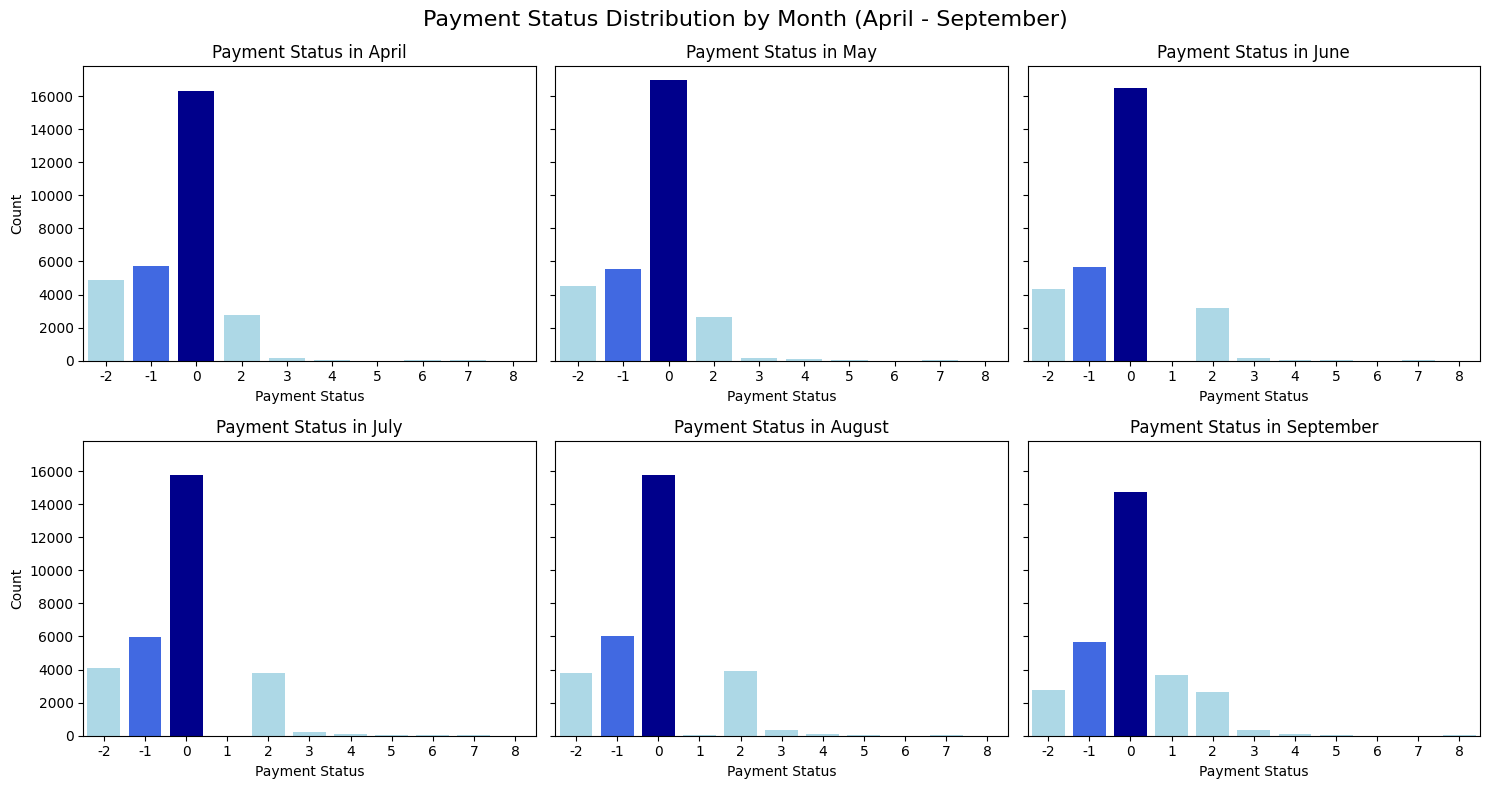

In [32]:
# Daftar kolom status pembayaran (urutan descending)
pay_cols = ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1']  # Urutan dibalik
months = ['April', 'May', 'June', 'July', 'August', 'September']  # Label bulan

# Menghitung total bill amount untuk setiap bulan (untuk highlighting)
total_bill_amt = eda[['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']].sum().values


# Membuat subplot chart
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)  # 2 baris, 3 kolom
fig.suptitle('Payment Status Distribution by Month (April - September)', fontsize=16)

# Loop untuk membuat setiap subplot
for i, (pay_col, month) in enumerate(zip(pay_cols, months)):
    row = i // 3  # Menentukan baris subplot
    col = i % 3  # Menentukan kolom subplot

    # Membuat count plot (bar chart) untuk setiap bulan
    ax = sns.countplot(x=pay_col, data=eda, ax=axes[row, col])

    # Mengatur judul subplot
    axes[row, col].set_title(f'Payment Status in {month.capitalize()}')  # Kapitalisasi nama bulan

    # Mengatur label sumbu
    axes[row, col].set_xlabel('Payment Status')
    axes[row, col].set_ylabel('Count')


    # Mengubah warna bar chart (highlight)
    heights = [p.get_height() for p in ax.patches]

    if len(heights) > 0: # handle empty plots
        max_height_index = np.argmax(heights)
        second_max_height_index = heights.index(sorted(heights)[-2] if len(heights) > 1 else 0)

        for j, patch in enumerate(ax.patches):
            if j == max_height_index:  # Nilai tertinggi
                patch.set_facecolor('darkblue')  # Warna biru tua
            elif j == second_max_height_index and j != max_height_index:  # Nilai kedua tertinggi, hindari duplikat dengan tertinggi
                patch.set_facecolor('royalblue')  # Warna biru royal
            else:
                patch.set_facecolor('lightblue')  # Warna biru muda


plt.tight_layout()  # Menyesuaikan layout subplot
plt.show()

## Correlation Bill Amount and Payment Amount

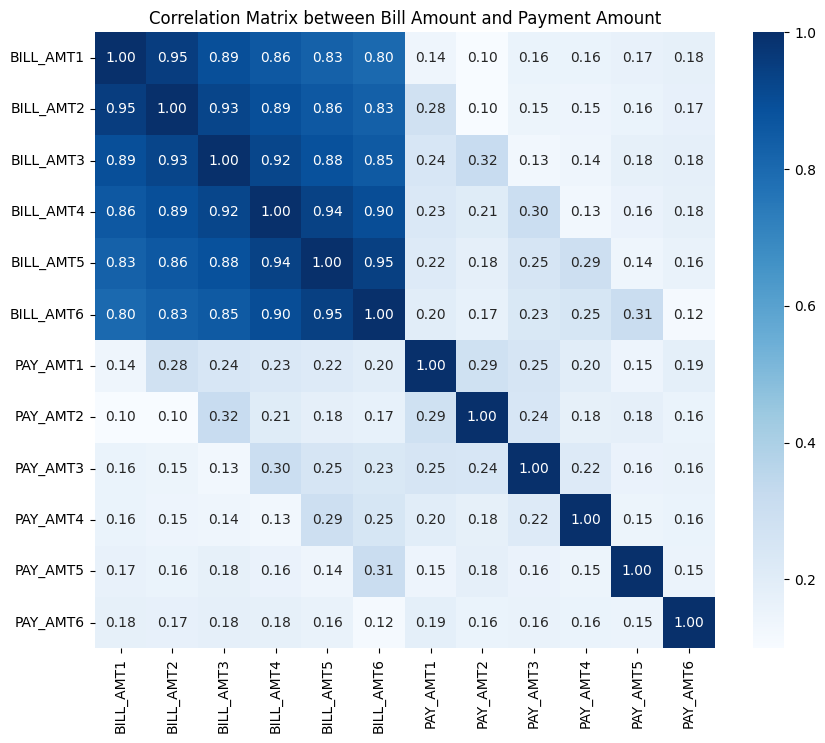

In [33]:
# Daftar kolom BILL_AMT dan PAY_AMT
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Membuat DataFrame yang berisi kolom BILL_AMT dan PAY_AMT
bill_pay_data = eda[bill_cols + pay_amt_cols]

# Menghitung correlation matrix
correlation_matrix = bill_pay_data.corr()

# Membuat heatmap dengan warna biru
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")  # cmap='Blues' untuk warna biru

# Mengatur judul
plt.title('Correlation Matrix between Bill Amount and Payment Amount')

plt.show()

From the heatmap of correlation between Bill Amount and Payment Amount, we can observe the following:

**Strong Positive Correlation:**  The diagonal line of the heatmap shows a strong positive correlation between bill amounts and payment amounts in the same month. This indicates that generally, as the bill amount increases, the amount of payment also tends to increase.

**Moderate Positive Correlation:** You may notice a moderate positive correlation between consecutive months' bill amounts (BILL_AMT1 vs BILL_AMT2, BILL_AMT2 vs BILL_AMT3, etc.) and payment amounts (PAY_AMT1 vs PAY_AMT2, PAY_AMT2 vs PAY_AMT3, etc.). This suggests a tendency for payment amounts in one month to influence the bill amounts in the subsequent month, indicating a relationship between the balance carried over and the payment behavior in future months.

**Insights into Payment Behavior:**  The strength of the correlations (represented by the color intensity) can suggest how consistently payment amounts are related to bill amounts. This may offer insights into payment behavior patterns of the customers, such as whether they tend to pay the full bill or only a portion of it each month.

**In general, the correlation heatmap provides a visual representation of the relationships between billing and payment variables, which helps in understanding how these variables interact and potentially influence default behavior.**


The scatter plot visualizes the relationship between the total bill amount and total payment amount for customers, categorized into different risk segments (Low-Risk, Medium-Risk, and High-Risk).

Observations:

 1. Low-Risk Customers:
    - Clustered towards the bottom-left, with lower total bill amounts and higher total payment amounts.
    - Generally have good payment behavior, with payments consistently close to or exceeding their bill amounts.
    - These customers pose the lowest risk of defaulting.

 2. Medium-Risk Customers:
    - Located in the central area of the plot.
    - Display a mix of bill amounts and payment amounts, indicating moderate payment behavior.
    - May have occasional delays in payment or lower payment percentages.
    - Represent a moderate risk of default.

 3. High-Risk Customers:
    - Concentrated in the top-right part of the plot, with higher total bill amounts and lower total payment amounts.
    - Have a history of payment delays or significantly high bill amounts relative to their payment capacity.
    - These customers are considered the most likely to default on their credit obligations.

Overall:

The scatter plot provides a clear visualization of customer segmentation based on their payment history and credit utilization.  
 - Customers with lower bill amounts and higher payment amounts are considered low-risk.
 - Customers with higher bill amounts and lower payment amounts are considered high-risk.
 - Customers with moderate bill amounts and payment amounts are considered medium-risk.

This visualization can help identify customers who require more attention or closer monitoring from a credit risk perspective.
For example, high-risk customers may benefit from stricter credit limits, while low-risk customers might be eligible for better loan terms or credit offerings.
By analyzing customer clusters through this plot, credit card companies can enhance their risk management strategies, identify early warning signs of potential default, and take proactive measures to minimize losses.


## FPD,DPD distribution

In [34]:
# Membalik urutan kolom BILL_AMT dan PAY_AMT
bill_cols = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']

# Membuat kolom FPD
eda['FPD'] = ((eda[bill_cols[0]] > 0) & (eda[pay_amt_cols[0]] == 0)).astype(int)

# Membuat kolom DPD1 hingga DPD5
for i in range(1, 6):
  eda[f'DPD{i}'] = ((eda['FPD'] == 1) & (eda[bill_cols[i]] > 0) & (eda[pay_amt_cols[i]] == 0)).astype(int)

# Menampilkan data
eda.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_status,age_group,FPD,DPD1,DPD2,DPD3,DPD4,DPD5
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-30,0,0,0,0,0,0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30,0,0,0,0,0,0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50+,0,0,0,0,0,0


In [35]:
# Menghitung jumlah default untuk setiap kolom
default_counts = eda[['FPD', 'DPD1', 'DPD2', 'DPD3', 'DPD4', 'DPD5']].sum()

# Membuat DataFrame dari default_counts
df_default_counts = pd.DataFrame(default_counts, columns=['Jumlah'])

# Menampilkan tabel
df_default_counts

,Jumlah
FPD,3469
DPD1,538
DPD2,999
DPD3,789
DPD4,772
DPD5,769


In [36]:
# Membuat DataFrame baru
df_monthly_defaults = pd.DataFrame(columns=['Month', 'FPD', 'DPD1', 'DPD2', 'DPD3', 'DPD4', 'DPD5'])

# Daftar kolom BILL_AMT dan PAY_AMT
bill_cols = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Menghitung jumlah default untuk setiap bulan
for i, month in enumerate(months):
  # FPD
  fpd_count = ((eda[bill_cols[i]] > 0) & (eda[pay_amt_cols[i]] == 0)).sum()

  # DPD1 hingga DPD5
  dpd_counts = []
  for j in range(1, 6):
    if j == 1:
      dpd_count = ((eda[bill_cols[i]] > 0) & (eda[pay_amt_cols[i]] == 0) & (eda['FPD'] == 1)).sum()
    else:
      dpd_count = ((eda[bill_cols[i]] > 0) & (eda[pay_amt_cols[i]] == 0) & (eda[f'DPD{j-1}'] == 1)).sum()
    dpd_counts.append(dpd_count)

  # Menambahkan data ke DataFrame
  df_monthly_defaults.loc[i] = [month, fpd_count] + dpd_counts

# Menampilkan DataFrame
df_monthly_defaults

,Month,FPD,DPD1,DPD2,DPD3,DPD4,DPD5
0,April,3469,3469,538,999,789,772
1,May,3546,538,538,278,273,246
2,June,3612,999,278,999,287,407
3,July,3396,789,273,287,789,257
4,August,3206,772,246,407,257,772
5,September,3495,769,258,346,359,247


In [37]:
# Membuat DataFrame baru
df_monthly_defaults_percentage = pd.DataFrame(columns=['Month', 'FPD', 'DPD1', 'DPD2', 'DPD3', 'DPD4', 'DPD5'])

# Daftar kolom BILL_AMT dan PAY_AMT
bill_cols = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Menghitung jumlah default untuk setiap bulan
for i, month in enumerate(months):
  # Total data per bulan
  total_count = eda[bill_cols[i]].count()

  # FPD
  fpd_count = ((eda[bill_cols[i]] > 0) & (eda[pay_amt_cols[i]] == 0)).sum()
  fpd_percentage = (fpd_count / total_count) * 100

  # DPD1 hingga DPD5
  dpd_percentages = []
  for j in range(1, 6):
    if j == 1:
      dpd_count = ((eda[bill_cols[i]] > 0) & (eda[pay_amt_cols[i]] == 0) & (eda['FPD'] == 1)).sum()
    else:
      dpd_count = ((eda[bill_cols[i]] > 0) & (eda[pay_amt_cols[i]] == 0) & (eda[f'DPD{j-1}'] == 1)).sum()
    dpd_percentage = (dpd_count / total_count) * 100
    dpd_percentages.append(dpd_percentage)

  # Menambahkan data ke DataFrame
  df_monthly_defaults_percentage.loc[i] = [month, fpd_percentage] + dpd_percentages

# Menampilkan DataFrame
df_monthly_defaults_percentage

,Month,FPD,DPD1,DPD2,DPD3,DPD4,DPD5
0,April,11.563333,11.563333,1.793333,3.330000,2.630000,2.573333
1,May,11.820000,1.793333,1.793333,0.926667,0.910000,0.820000
2,June,12.040000,3.330000,0.926667,3.330000,0.956667,1.356667
3,July,11.320000,2.630000,0.910000,0.956667,2.630000,0.856667
4,August,10.686667,2.573333,0.820000,1.356667,0.856667,2.573333
5,September,11.650000,2.563333,0.860000,1.153333,1.196667,0.823333


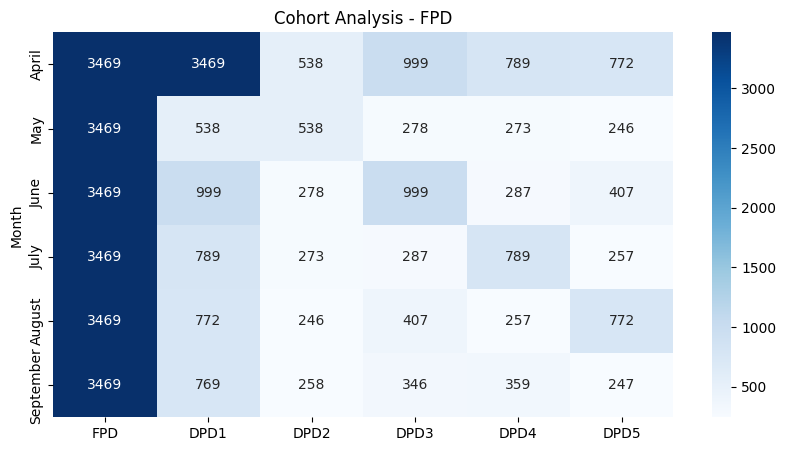

In [38]:
# Membuat DataFrame baru
cohort_analysis = pd.DataFrame(columns=['Month', 'FPD', 'DPD1', 'DPD2', 'DPD3', 'DPD4', 'DPD5'])

# Daftar kolom BILL_AMT dan PAY_AMT
bill_cols = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Menghitung cohort FPD
fpd_cohort = ((eda['BILL_AMT6'] > 0) & (eda['PAY_AMT6'] == 0))

# Menghitung jumlah default untuk setiap bulan
for i, month in enumerate(months):
  # FPD
  fpd_count = fpd_cohort.sum()

  # DPD1 hingga DPD5
  dpd_counts = []
  for j in range(1, 6):
    if j == 1:
      dpd_count = ((fpd_cohort) & (eda[bill_cols[i]] > 0) & (eda[pay_amt_cols[i]] == 0)).sum()
    else:
      dpd_count = ((fpd_cohort) & (eda[bill_cols[i]] > 0) & (eda[pay_amt_cols[i]] == 0) & (eda[f'DPD{j-1}'] == 1)).sum()
    dpd_counts.append(dpd_count)

  # Menambahkan data ke DataFrame
  cohort_analysis.loc[i] = [month, fpd_count] + dpd_counts

# Mengubah Month menjadi index
cohort_analysis = cohort_analysis.set_index('Month')

# Membuat heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cohort_analysis, annot=True, fmt="d", cmap='Blues')
plt.title('Cohort Analysis - FPD')
plt.show()

## Payment performance (payment ratio)

In [39]:
# Create a new DataFrame
df_payment_performance = pd.DataFrame(columns=['Month', 'Payment Ratio'])

# List of BILL_AMT and PAY_AMT columns
bill_cols = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Calculate payment ratio for each month
for i, month in enumerate(months):
  # Calculate total bill amount and total payment amount for the month
  total_bill_amt = eda[bill_cols[i]].sum()
  total_pay_amt = eda[pay_amt_cols[i]].sum()

  # Calculate payment ratio
  if total_bill_amt > 0:
    payment_ratio = (total_pay_amt / total_bill_amt) * 100
  else:
    payment_ratio = 0

  # Add data to DataFrame
  df_payment_performance.loc[i] = [month, payment_ratio]

# Display DataFrame
df_payment_performance

,Month,Payment Ratio
0,April,13.417202
1,May,11.905782
2,June,11.155219
3,July,11.115360
4,August,12.040006
5,September,11.056642


In [40]:
# Create a new DataFrame
df_payment_counts = pd.DataFrame(columns=['Month', 'Paying Clients'])

# List of PAY_AMT columns
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Calculate the number of paying clients for each month
for i, month in enumerate(months):
  # Count clients with payment amount greater than 0
  paying_clients_count = (eda[pay_amt_cols[i]] > 0).sum()

  # Add data to DataFrame
  df_payment_counts.loc[i] = [month, paying_clients_count]

# Display DataFrame
df_payment_counts

,Month,Paying Clients
0,April,22827
1,May,23297
2,June,23592
3,July,24032
4,August,24604
5,September,24751


In [41]:
# prompt: berikan saya jumlah paying clients dan non paying client, serta berikan persentase paying ratio

import pandas as pd
# Create a new DataFrame
df_payment_status = pd.DataFrame(columns=['Month', 'Paying Clients', 'Non-Paying Clients', 'Paying Ratio'])

# List of PAY_AMT columns
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Calculate the number of paying and non-paying clients, and paying ratio for each month
for i, month in enumerate(months):
  # Count clients with payment amount greater than 0
  paying_clients_count = (eda[pay_amt_cols[i]] > 0).sum()
  non_paying_clients_count = (eda[pay_amt_cols[i]] == 0).sum()
  total_clients = eda.shape[0]

  # Calculate paying ratio
  if total_clients > 0:
    paying_ratio = (paying_clients_count / total_clients) * 100
  else:
    paying_ratio = 0

  # Add data to DataFrame
  df_payment_status.loc[i] = [month, paying_clients_count, non_paying_clients_count, paying_ratio]

# Display DataFrame
print(tabulate(df_payment_status, headers='keys', tablefmt='psql'))


+----+-----------+------------------+----------------------+----------------+
|    | Month     |   Paying Clients |   Non-Paying Clients |   Paying Ratio |
|----+-----------+------------------+----------------------+----------------|
|  0 | April     |            22827 |                 7173 |        76.09   |
|  1 | May       |            23297 |                 6703 |        77.6567 |
|  2 | June      |            23592 |                 6408 |        78.64   |
|  3 | July      |            24032 |                 5968 |        80.1067 |
|  4 | August    |            24604 |                 5396 |        82.0133 |
|  5 | September |            24751 |                 5249 |        82.5033 |
+----+-----------+------------------+----------------------+----------------+


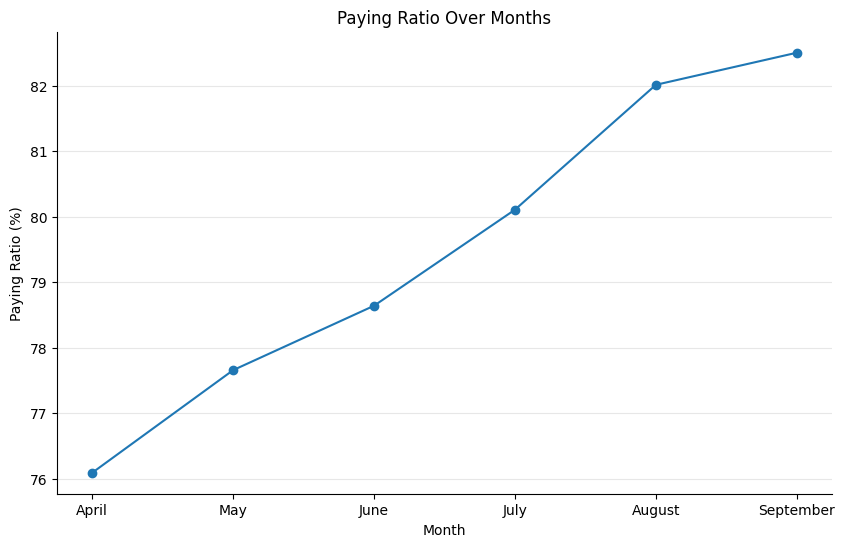

In [42]:
# prompt: dari table payin ratio diatas, buatkan saya line chart nya

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_payment_status['Month'], df_payment_status['Paying Ratio'], marker='o')
plt.title('Paying Ratio Over Months')
plt.xlabel('Month')
plt.ylabel('Paying Ratio (%)')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid
plt.grid(axis='y', alpha=0.3)


plt.show()


In [43]:
# Create a new DataFrame
df_bill_payment = pd.DataFrame(columns=['Month', 'Bill Amount', 'Payment Amount', 'Payment Ratio'])

# List of BILL_AMT and PAY_AMT columns
bill_amt_cols = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Calculate bill and payment amounts for each month
for i, month in enumerate(months):
  # Calculate total bill amount and total payment amount for the month
  bill_amount = eda[bill_amt_cols[i]].sum()
  payment_amount = eda[pay_amt_cols[i]].sum()

  # Calculate payment ratio
  if bill_amount > 0:
    payment_ratio = (payment_amount / bill_amount) * 100
  else:
    payment_ratio = 0

  # Add data to DataFrame
  df_bill_payment.loc[i] = [month, bill_amount, payment_amount, payment_ratio]

# Display DataFrame
df_bill_payment

,Month,Bill Amount,Payment Amount,Payment Ratio
0,April,1.166153e+09,156465077.0,13.417202
1,May,1.209342e+09,143981629.0,11.905782
2,June,1.297888e+09,144782306.0,11.155219
3,July,1.410395e+09,156770445.0,11.115360
4,August,1.475372e+09,177634905.0,12.040006
5,September,1.536700e+09,169907415.0,11.056642


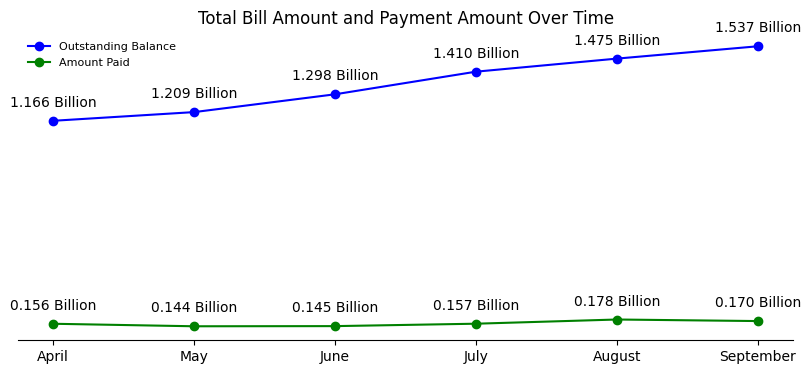

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a new DataFrame
df_bill_payment = pd.DataFrame(columns=['Month', 'Bill Amount', 'Payment Amount'])

# List of BILL_AMT and PAY_AMT columns
bill_amt_cols = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Calculate bill and payment amounts for each month
for i, month in enumerate(months):
  # Calculate total bill amount and total payment amount for the month
  bill_amount = eda[bill_amt_cols[i]].sum()
  payment_amount = eda[pay_amt_cols[i]].sum()

  # Add data to DataFrame
  df_bill_payment.loc[i] = [month, bill_amount, payment_amount]

# Create a line chart
plt.figure(figsize=(10, 4))
plt.plot(df_bill_payment['Month'], df_bill_payment['Bill Amount'], marker='o', color='blue', label='Outstanding Balance')
plt.plot(df_bill_payment['Month'], df_bill_payment['Payment Amount'], marker='o', color='green', label='Amount Paid')

# Set title and labels
plt.title('Total Bill Amount and Payment Amount Over Time')
plt.xlabel('')
plt.ylabel('')

# Add legend
plt.legend(fontsize=8, frameon=False,loc='best')

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid
plt.grid(axis='y', alpha=0.3)

# Remove y-axis and add value labels to data points
plt.gca().spines['left'].set_visible(False)
plt.yticks([])

for line in plt.gca().lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        if y >= 1e9:
            label = f'{y/1e9:.3f} Billion'
        else:
            label = f'{y/1e9:.3f} Billion'
        plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')


plt.show()

In [45]:
# Create a new DataFrame
df_bill_payment = pd.DataFrame(columns=['Month', 'Bill Amount', 'Payment Amount'])

# List of BILL_AMT and PAY_AMT columns
bill_amt_cols = ['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']
pay_amt_cols = ['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Calculate bill and payment amounts for each month
for i, month in enumerate(months):
  # Calculate total bill amount and total payment amount for the month
  bill_amount = eda[bill_amt_cols[i]].sum()
  payment_amount = eda[pay_amt_cols[i]].sum()

  # Add data to DataFrame
  df_bill_payment.loc[i] = [month, bill_amount, payment_amount]

# Calculate Payment Ratio
df_bill_payment['Payment Ratio'] = (df_bill_payment['Payment Amount'] / df_bill_payment['Bill Amount']) * 100
df_bill_payment['Payment Ratio'] = df_bill_payment['Payment Ratio'].fillna(0)


# Display DataFrame in a table format
print(tabulate(df_bill_payment, headers='keys', tablefmt='psql'))


+----+-----------+---------------+------------------+-----------------+
|    | Month     |   Bill Amount |   Payment Amount |   Payment Ratio |
|----+-----------+---------------+------------------+-----------------|
|  0 | April     |   1.16615e+09 |      1.56465e+08 |         13.4172 |
|  1 | May       |   1.20934e+09 |      1.43982e+08 |         11.9058 |
|  2 | June      |   1.29789e+09 |      1.44782e+08 |         11.1552 |
|  3 | July      |   1.41039e+09 |      1.5677e+08  |         11.1154 |
|  4 | August    |   1.47537e+09 |      1.77635e+08 |         12.04   |
|  5 | September |   1.5367e+09  |      1.69907e+08 |         11.0566 |
+----+-----------+---------------+------------------+-----------------+


# Data Modeling

## Customer segmentation by Risk

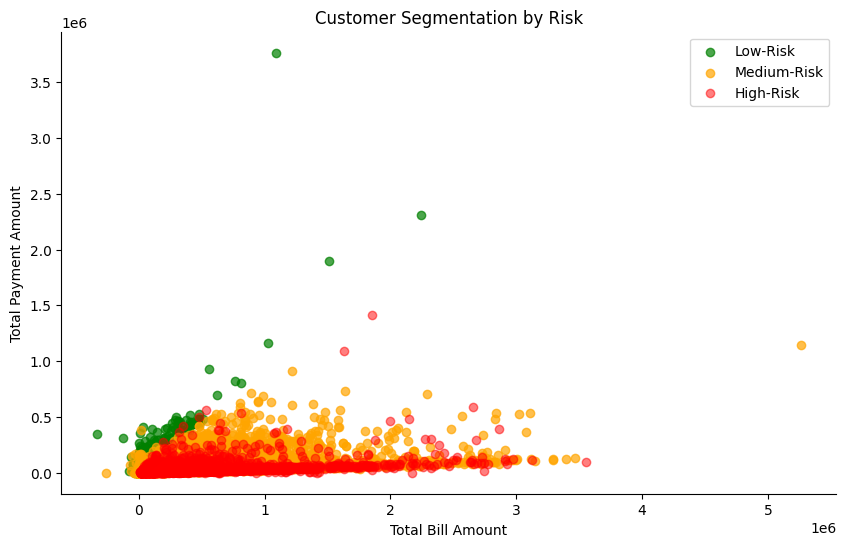

In [46]:
# Daftar kolom BILL_AMT dan PAY_AMT
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Menghitung total tagihan dan total pembayaran untuk setiap nasabah
eda['Total Bill Amount'] = eda[bill_cols].sum(axis=1)
eda['Total Payment Amount'] = eda[pay_amt_cols].sum(axis=1)

# Menentukan segmen risiko berdasarkan logika yang telah dijelaskan sebelumnya
def assign_risk_segment(row):
    if row['PAY_1'] > 0 or row['PAY_2'] > 0 or row['PAY_3'] > 0:  # Minimal satu keterlambatan pembayaran
        if row['Total Bill Amount'] > row['LIMIT_BAL'] * 0.8:  # Rasio penggunaan kredit tinggi
            return 'High-Risk'
        else:
            return 'Medium-Risk'
    else:  # Tidak ada keterlambatan pembayaran
        if row['Total Payment Amount'] >= row['Total Bill Amount'] * 0.9:  # Pembayaran hampir penuh
            return 'Low-Risk'
        else:
            return 'Medium-Risk'

eda['Risk Segment'] = eda.apply(assign_risk_segment, axis=1)

# Membuat scatter plot dengan warna berbeda untuk setiap segmen risiko
plt.figure(figsize=(10, 6))
colors = {'Low-Risk': 'green', 'Medium-Risk': 'orange', 'High-Risk': 'red'}
for segment, color in colors.items():
    segment_data = eda[eda['Risk Segment'] == segment]
    if segment == 'Medium-Risk':
        alpha_value = 0.2  # Transparansi untuk kelas Medium-Risk
    if segment == 'High-Risk':
        alpha_value = 0.5  # Transparansi untuk kelas High-Risk
    else:
        alpha_value = 0.7  # Transparansi untuk kelas Low-Risk dan High-Risk
    plt.scatter(segment_data['Total Bill Amount'], segment_data['Total Payment Amount'],
                c=color, label=segment, alpha=alpha_value)

# Mengatur judul dan label sumbu
plt.title('Customer Segmentation by Risk')
plt.xlabel('Total Bill Amount')
plt.ylabel('Total Payment Amount')

# Menghilangkan border top dan right
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Menambahkan legend
plt.legend()

plt.show()

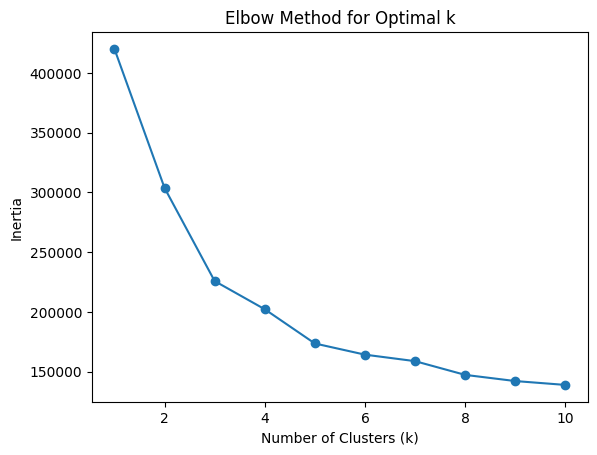

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

             LIMIT_BAL        AGE     PAY_1     PAY_2     PAY_3     PAY_4  \
cluster                                                                     
0        278046.366504  37.036995  0.293949  0.268426  0.232578  0.189561   
1        219523.537259  36.465218 -0.770059 -1.154183 -1.235373 -1.275872   
2        109326.549722  34.505962  0.409202  0.447157  0.447406  0.381297   

            PAY_5     PAY_6      BILL_AMT1      BILL_AMT2      BILL_AMT3  \
cluster                                                                    
0        0.165759  0.166332  205328.493547  201672.845713  196702.841698   
1       -1.279874 -1.277492   10091.111397    7706.776063    6697.525443   
2        0.303827  0.255509   44623.468818   43152.764467   40839.503277   

             BILL_AMT4      BILL_AMT5      BILL_AMT6  
cluster                                               
0        182955.123602  170752.395469  163386.791511  
1          6355.629788    6346.143796    6493.600915  
2         370

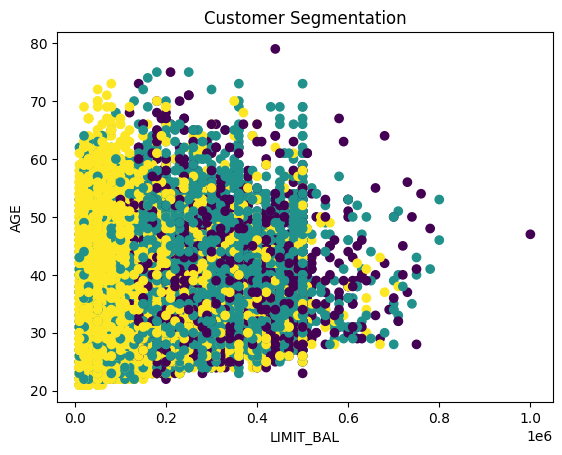

In [48]:
# Apply K-Means clustering with k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics
print(df.groupby('cluster')[features].mean())

# Visualize clusters (example using scatter plot)
plt.scatter(df['LIMIT_BAL'], df['AGE'], c=df['cluster'])
plt.xlabel('LIMIT_BAL')
plt.ylabel('AGE')
plt.title('Customer Segmentation')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Cluster
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,0


In [50]:
# prompt: saya ingin melihat berapa jumlah dari masing-masing cluster nya

print(X["Cluster"].value_counts())


Cluster
0    19297
2     7058
1     3645
Name: count, dtype: int64


In [51]:
df = df.drop('cluster', axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_status
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<Axes: >

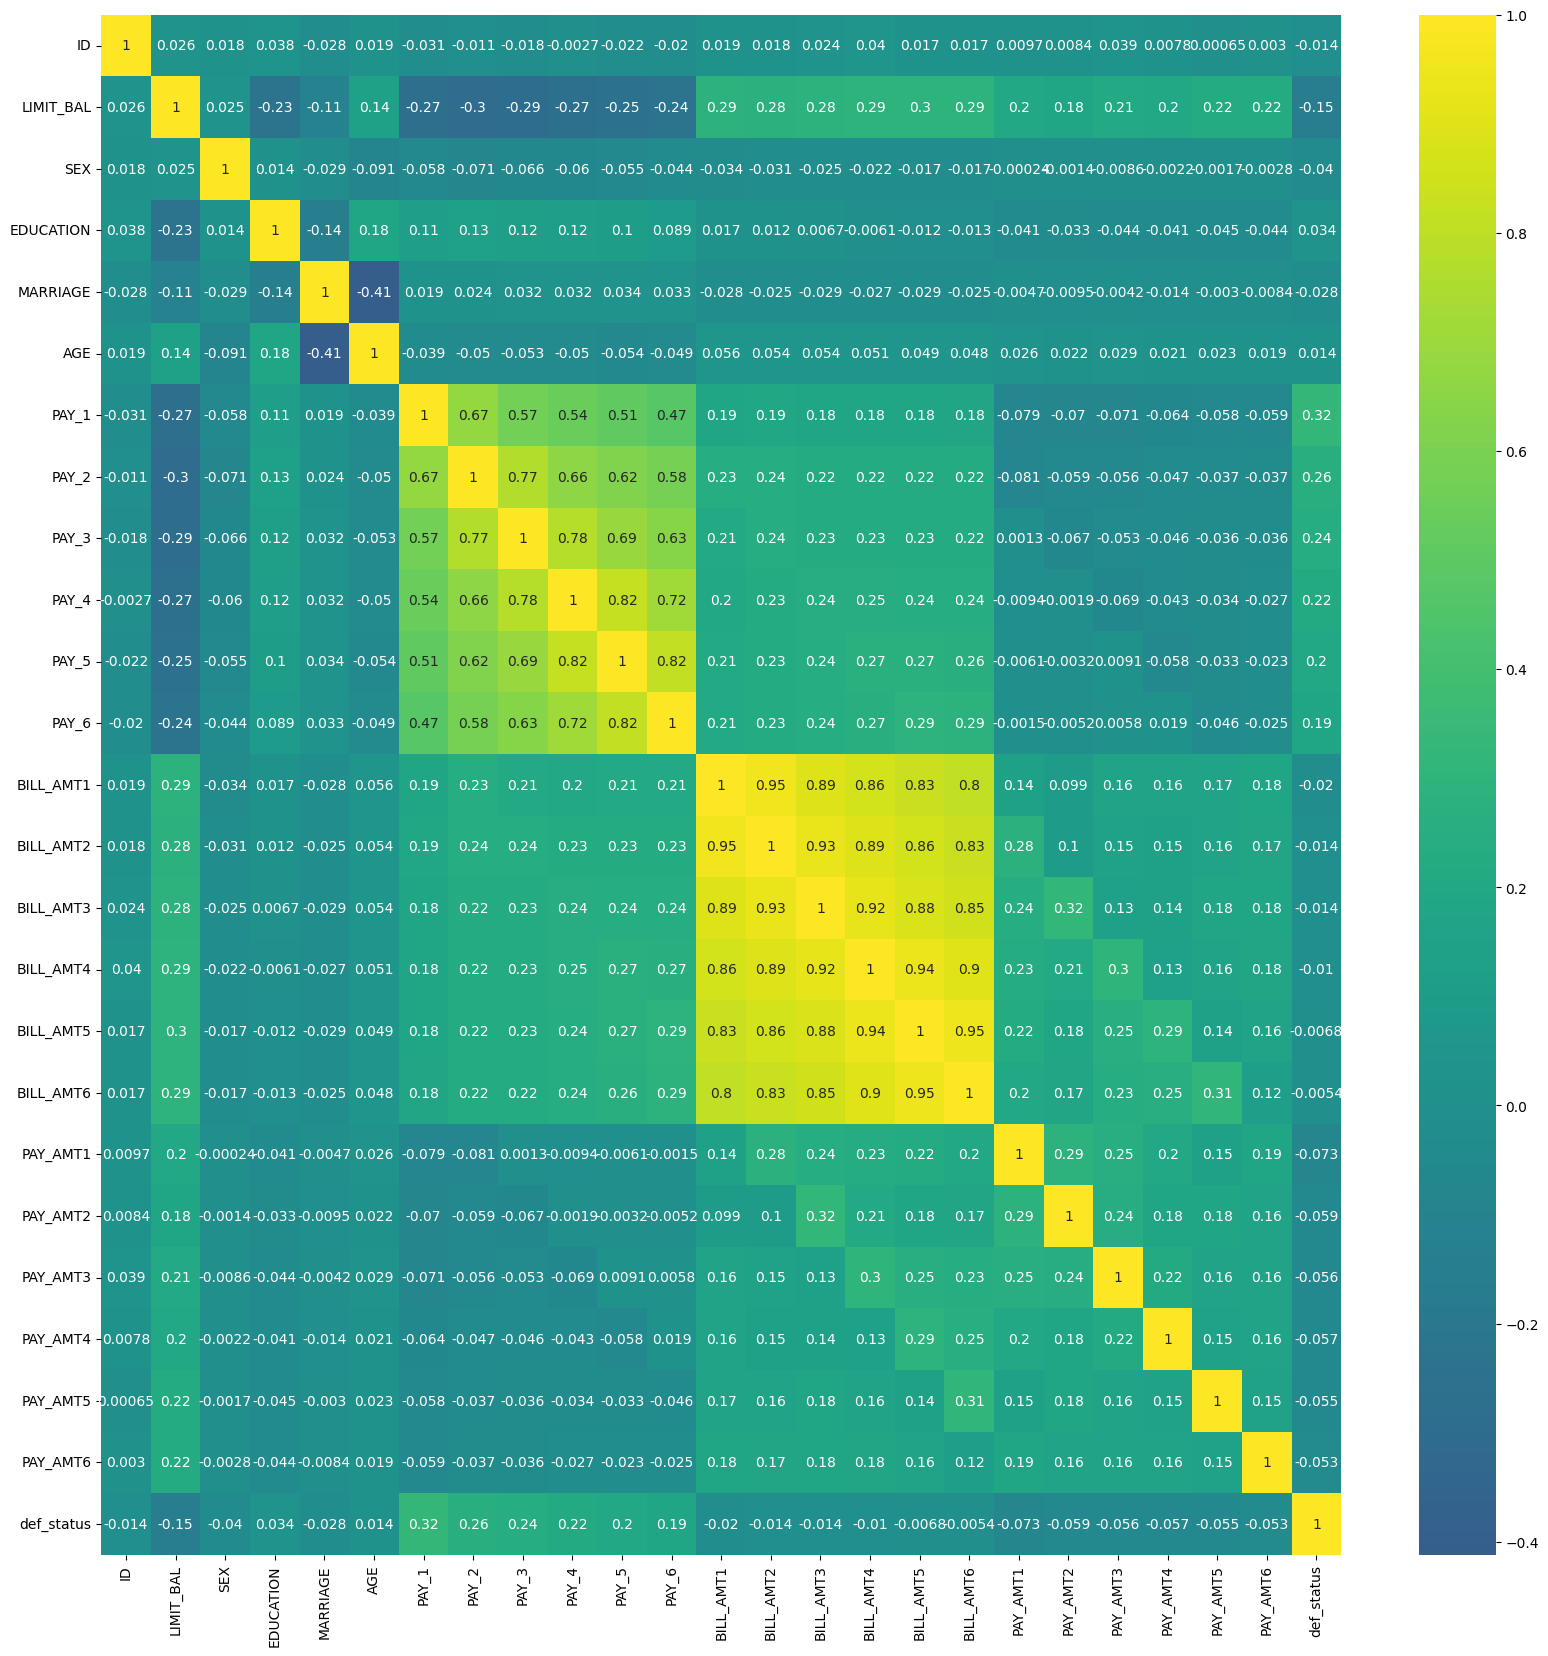

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap='viridis', center=0)

In [53]:
# Definisikan nama kolom untuk variabel kategorikal
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2',  'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Definisikan nama kolom untuk variabel numerikal
numerical_vars = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Buat DataFrame baru yang hanya berisi variabel kategorikal
df_categorical = df[categorical_vars]
print("Variabel Kategorikal:\n", df_categorical.head())

# Buat DataFrame baru yang hanya berisi variabel numerikal
df_numerical = df[numerical_vars]
print("\nVariabel Numerikal:\n", df_numerical.head())

Variabel Kategorikal:
    SEX  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0    2          2         1      2      2     -1     -1     -2     -2
1    2          2         2     -1      2      0      0      0      2
2    2          2         2      0      0      0      0      0      0
3    2          2         1      0      0      0      0      0      0
4    1          2         1     -1      0     -1      0      0      0

Variabel Numerikal:
    LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0    20000.0   24     3913.0     3102.0      689.0        0.0        0.0   
1   120000.0   26     2682.0     1725.0     2682.0     3272.0     3455.0   
2    90000.0   34    29239.0    14027.0    13559.0    14331.0    14948.0   
3    50000.0   37    46990.0    48233.0    49291.0    28314.0    28959.0   
4    50000.0   57     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  

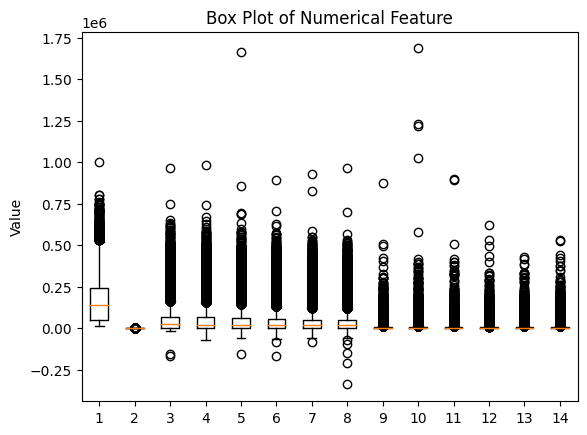

In [54]:
plt.boxplot(df_numerical)
plt.title('Box Plot of Numerical Feature')
plt.ylabel('Value')
plt.show()

In [55]:
# prompt: berikan saya code untuk mencari modified z-score

import numpy as np
def modified_z_score(data):
  """
  Calculate the modified Z-score for a given dataset.

  Args:
      data: A list or numpy array of numerical values.

  Returns:
      A list of modified Z-scores corresponding to the input data.
  """
  median = np.median(data)
  mad = np.median(np.abs(data - median))
  modified_z_scores = 0.6745 * (data - median) / mad
  return modified_z_scores

# Example usage:
# Assuming 'df_numerical' is your DataFrame with numerical features
for column in df_numerical.columns:
  df_numerical[f'{column}_modified_zscore'] = modified_z_score(df_numerical[column])

df_numerical.head()


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL_modified_zscore,AGE_modified_zscore,BILL_AMT1_modified_zscore,BILL_AMT2_modified_zscore,BILL_AMT3_modified_zscore,BILL_AMT4_modified_zscore,BILL_AMT5_modified_zscore,BILL_AMT6_modified_zscore,PAY_AMT1_modified_zscore,PAY_AMT2_modified_zscore,PAY_AMT3_modified_zscore,PAY_AMT4_modified_zscore,PAY_AMT5_modified_zscore,PAY_AMT6_modified_zscore
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,-0.899333,-1.124167,-0.571409,-0.586598,-0.663925,-0.688817,-0.690363,-0.687221,-0.733152,-0.447182,-0.676379,-0.674500,-0.674500,-0.674500
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,-0.149889,-0.899333,-0.609496,-0.631230,-0.595717,-0.570519,-0.558616,-0.555944,-0.733152,-0.341823,-0.300613,-0.224833,-0.674500,0.224833
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,-0.374722,0.000000,0.212169,-0.232493,-0.223464,-0.170686,-0.120364,-0.061271,-0.203188,-0.172436,-0.300613,-0.224833,-0.224833,1.573833
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,-0.674500,0.337250,0.761379,0.876202,0.999421,0.334864,0.413905,0.502242,-0.034912,0.003388,-0.225460,-0.179867,-0.193806,-0.224833
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,-0.674500,2.585583,-0.425869,-0.503363,0.538905,0.068260,0.039715,0.082929,-0.034912,11.745989,3.081281,3.372500,-0.364680,-0.369176


In [56]:
# prompt: setelah mendapat nilai modified z-score apa yang bisa saya ketahui setelah ini

import matplotlib.pyplot as plt
# Menentukan ambang batas untuk mendeteksi outlier
threshold = 3.5  # Misalnya, nilai modified Z-score di atas 3.5 dianggap sebagai outlier

# Mencari outlier di setiap kolom berdasarkan modified Z-score
for column in df_numerical.columns:
  if 'modified_zscore' in column:
    outliers = df_numerical[df_numerical[column] > threshold]
    print(f"Outliers in {column.replace('_modified_zscore', '')}:")
    print(outliers)

# Menghapus outlier dari DataFrame
for column in df_numerical.columns:
    if 'modified_zscore' in column:
        df_numerical = df_numerical[(df_numerical[column] <= threshold)]

# Menganalisis data setelah menghapus outlier (misalnya, menghitung statistik deskriptif)
# print(df_numerical.describe())

# Visualisasikan data setelah menghapus outlier
# plt.boxplot(df_numerical)
# plt.title('Box Plot of Numerical Features After Outlier Removal')
# plt.ylabel('Value')
# plt.show()

# Anda dapat melakukan langkah-langkah tambahan seperti:
# - Menganalisis distribusi data setelah menghapus outlier.
# - Membandingkan statistik deskriptif sebelum dan sesudah menghapus outlier.
# - Membangun model dengan data yang telah dibersihkan dari outlier dan mengevaluasi performanya.


Streaming output truncated to the last 5000 lines.
11535                  2.797202                  0.370975   
11536                  4.562927                  9.157462   
11553                  0.793618                  0.270250   
11567                  8.004568                 28.381611   
11568                  4.984912                  5.677491   
11572                  3.123367                 -0.674500   
11582                  3.359348                 21.901914   
11583                 -0.671870                 -0.662359   
11587                  3.081281                  3.822167   
11591                  4.211210                 -0.674500   
11621                  0.112730                  0.468553   
11624                  3.104955                  0.178518   
11630                  2.756995                  2.824356   
11632                  6.838942                  1.573833   
11633                  1.583854                  0.262156   
11634                  3.081281   

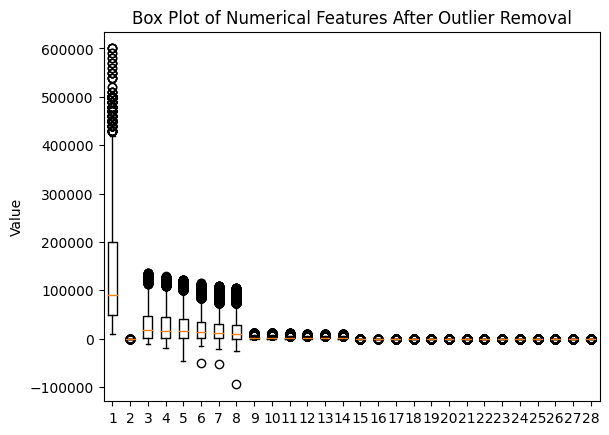

In [57]:
# Visualisasikan data setelah menghapus outlier
plt.boxplot(df_numerical)
plt.title('Box Plot of Numerical Features After Outlier Removal')
plt.ylabel('Value')
plt.show()

In [58]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,19163.0,129624.380316,109963.080854,10000.000000,50000.000000,90000.000000,200000.000000,600000.000000
AGE,19163.0,35.169859,9.402497,21.000000,27.000000,34.000000,41.000000,65.000000
BILL_AMT1,19163.0,27773.836769,30296.146766,-11545.000000,2117.500000,17172.000000,46792.500000,135322.000000
BILL_AMT2,19163.0,26202.988259,29125.988048,-18618.000000,1520.000000,16287.000000,44610.000000,128882.000000
BILL_AMT3,19163.0,24546.647446,27697.880850,-46127.000000,1138.000000,15437.000000,40654.000000,122250.000000
BILL_AMT4,19163.0,22262.541356,25778.659120,-50616.000000,861.000000,13580.000000,33849.000000,115046.000000
BILL_AMT5,19163.0,20407.495799,24481.801679,-53007.000000,632.000000,11093.000000,29868.000000,109352.000000
BILL_AMT6,19163.0,19471.641079,24177.907177,-94625.000000,395.000000,9587.000000,29366.500000,103986.000000
PAY_AMT1,19163.0,2043.719668,2033.857692,0.000000,325.000000,1700.000000,3000.000000,12110.000000
PAY_AMT2,19163.0,1936.829306,1997.656723,0.000000,218.000000,1541.000000,2830.000000,12331.000000


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [60]:
# prompt: saya mau melakukan dimentional reduction, berikan saya saran dulu

import pandas as pd
# Saran untuk Dimensional Reduction

# Berdasarkan data yang Anda miliki, beberapa teknik dimensional reduction yang bisa dipertimbangkan adalah:

# 1. Principal Component Analysis (PCA):
#    - Cocok untuk mengurangi dimensi data numerik dengan mempertahankan informasi penting.
#    - PCA mengidentifikasi komponen utama (principal components) yang merupakan kombinasi linier dari variabel asli.
#    - Komponen utama ini dapat digunakan untuk merepresentasikan data dengan dimensi yang lebih rendah.
#    - PCA sangat berguna jika Anda memiliki banyak variabel numerik yang berkorelasi.

# 2. t-distributed Stochastic Neighbor Embedding (t-SNE):
#    - Cocok untuk visualisasi data berdimensi tinggi, khususnya untuk memahami struktur kelompok/cluster dalam data.
#    - t-SNE mengurangi dimensi data sambil mempertahankan hubungan antar titik data.
#    - t-SNE lebih efektif dalam memisahkan kelompok yang rapat dan mengurangi dimensionalitas menjadi 2 atau 3 dimensi, sehingga cocok untuk visualisasi.

# 3. Linear Discriminant Analysis (LDA):
#    - Cocok untuk mengurangi dimensi data sambil memaksimalkan pemisahan antar kelas.
#    - LDA mencari kombinasi linier dari variabel yang memisahkan kelas-kelas dengan baik.
#    - LDA sangat berguna jika Anda memiliki masalah klasifikasi dan ingin mengurangi dimensi data sebelum membangun model.

# Pilihan Teknik:
# - Jika tujuan utama adalah mengurangi dimensi data numerik dan mempertahankan informasi penting, PCA adalah pilihan yang baik.
# - Jika tujuan utama adalah visualisasi data berdimensi tinggi untuk memahami struktur kelompok, t-SNE adalah pilihan yang baik.
# - Jika tujuan utama adalah mengurangi dimensi data untuk masalah klasifikasi, LDA adalah pilihan yang baik.

# Langkah-langkah Penerapan:
# 1. Tentukan tujuan dimensional reduction (misalnya, mengurangi dimensi data numerik, visualisasi data, pemisahan kelas).
# 2. Pilih teknik dimensional reduction yang sesuai dengan tujuan Anda.
# 3. Siapkan data Anda dengan melakukan standarisasi atau normalisasi.
# 4. Terapkan teknik dimensional reduction yang dipilih dan tentukan jumlah komponen atau dimensi yang diinginkan.
# 5. Evaluasi hasil dimensional reduction (misalnya, dengan memeriksa jumlah varians yang dipertahankan, visualisasi data).

# Contoh Implementasi PCA:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Pilih fitur numerik yang ingin Anda kurangi dimensinya
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Buat DataFrame baru yang hanya berisi fitur numerik
X = df[numerical_features]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan PCA dengan jumlah komponen yang diinginkan (misalnya, 3)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Buat DataFrame baru yang berisi principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Anda dapat menggabungkan principal_df dengan DataFrame asli Anda jika diperlukan.

# Tampilkan hasil
print(principal_df.head())
print("Varians yang dipertahankan oleh setiap komponen:", pca.explained_variance_ratio_)

# Anda dapat melangkah lebih jauh dengan:
# - Mencari jumlah komponen yang optimal dengan melihat plot scree atau elbow method.
# - Membangun model dengan data yang telah direduksi dimensinya dan mengevaluasi performanya.


        PC1       PC2       PC3
0 -1.958481 -0.537045 -1.329990
1 -1.735307 -0.217341 -0.863764
2 -1.224240 -0.284887 -0.213208
3 -0.540935 -0.666624 -0.097471
4 -0.848741  0.739026  1.392033
Varians yang dipertahankan oleh setiap komponen: [0.42279426 0.12258339 0.07464922]


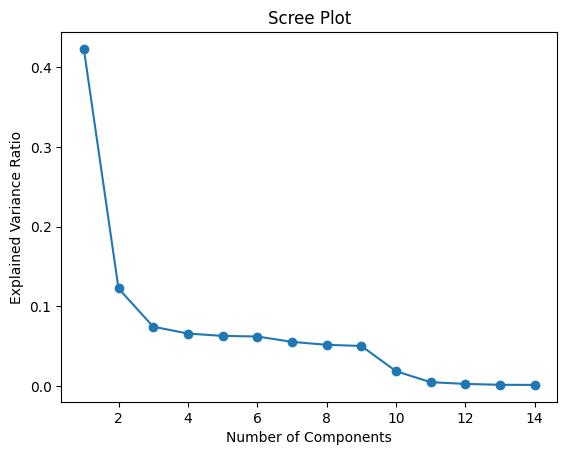

In [61]:
# prompt: bagaimana saya dapat melihat jumlah komponen yang optimal dengan menggunakan plot scree

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pilih fitur numerik yang ingin Anda kurangi dimensinya
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Buat DataFrame baru yang hanya berisi fitur numerik
X = df[numerical_features]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lakukan PCA tanpa menentukan jumlah komponen
pca = PCA()
pca.fit(X_scaled)

# Plot scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df2 = df.copy()

# Pilih fitur untuk clustering
features = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df2[features]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lakukan K-Means clustering dengan k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
df2['cluster'] = kmeans.fit_predict(X_scaled)

# Analisis karakteristik cluster berdasarkan def_status
cluster_analysis = df2.groupby('cluster')['def_status'].agg(['mean', 'count'])
print(cluster_analysis)

# Visualisasi cluster dengan default.payment.next.month
# plt.figure(figsize=(8, 6))
# plt.scatter(df2['LIMIT_BAL'], df2['PAY_1'], c=df2['cluster'], cmap='viridis')
# plt.xlabel('LIMIT_BAL')
# plt.ylabel('PAY_1')
# plt.title('Customer Segmentation by Cluster')
# plt.show()

# Menentukan kriteria cluster yang berhubungan dengan risiko default
for cluster in range(3):
  cluster_data = df2[df2['cluster'] == cluster]
  default_rate = cluster_data['def_status'].mean()
  print(f"Cluster {cluster}:")
  print(f"  - Default Rate: {default_rate:.2%}")
  # Menambahkan analisis lebih lanjut untuk menentukan kriteria lain,
  # seperti rata-rata BILL_AMT, PAY_AMT, LIMIT_BAL, AGE, dll.
  print(cluster_data[features].describe())

# Mencari hubungan antara cluster dan default.payment.next.month
# Anda dapat melakukan analisis lebih lanjut untuk menentukan kriteria masing-masing cluster.
# Contoh:
# - Rata-rata PAY_1, PAY_2, ... (history pembayaran) untuk setiap cluster.
# - Rata-rata BILL_AMT dan PAY_AMT untuk setiap cluster.
# - Rasio penggunaan kredit (Total Bill Amount / LIMIT_BAL) untuk setiap cluster.
# - Distribusi umur (AGE) di setiap cluster.
#
# Anda dapat menggunakan informasi ini untuk memberi label pada cluster dan menentukan
# apakah cluster tersebut memiliki risiko default yang tinggi, sedang, atau rendah.


             mean  count
cluster                 
0        0.188642   3557
1        0.164813  10521
2        0.265733  15922
Cluster 0:
  - Default Rate: 18.86%
            LIMIT_BAL          AGE        PAY_1        PAY_2        PAY_3  \
count     3557.000000  3557.000000  3557.000000  3557.000000  3557.000000   
mean    283943.682879    36.999719     0.250773     0.219005     0.193421   
std     118118.632884     8.696304     0.885185     0.858753     0.781703   
min      50000.000000    22.000000    -2.000000    -2.000000    -2.000000   
25%     200000.000000    30.000000     0.000000     0.000000     0.000000   
50%     260000.000000    35.000000     0.000000     0.000000     0.000000   
75%     350000.000000    42.000000     0.000000     0.000000     0.000000   
max    1000000.000000    79.000000     8.000000     7.000000     6.000000   

             PAY_4        PAY_5        PAY_6      BILL_AMT1      BILL_AMT2  \
count  3557.000000  3557.000000  3557.000000    3557.000000    3557

In [80]:
# prompt: saya ingin mengetahui berdasarkan 3 cluster tersebut, saya ingin mendapatkan masing-masing variable yang mendeskripsikan tiap cluster. misal age_group di cluster 0 di 31-40. tidak ada total bill amount, yang ada hanya bill_amt. kolom pay_1 hingga pay_6 tampilkan nilai dengan modus terbesar saja. jangan lupa berikan masing-masing cluster percentage default nya. Tambahkan var marr, edu,sex,pay_amt

import pandas as pd

# Mencari hubungan antara cluster dan default.payment.next.month
# Anda dapat melakukan analisis lebih lanjut untuk menentukan kriteria masing-masing cluster.
# Contoh:
# - Rata-rata PAY_1, PAY_2, ... (history pembayaran) untuk setiap cluster.
# - Rata-rata BILL_AMT dan PAY_AMT untuk setiap cluster.
# - Rasio penggunaan kredit (Total Bill Amount / LIMIT_BAL) untuk setiap cluster.
# - Distribusi umur (AGE) di setiap cluster.
#
# Anda dapat menggunakan informasi ini untuk memberi label pada cluster dan menentukan
# apakah cluster tersebut memiliki risiko default yang tinggi, sedang, atau rendah.


def describe_clusters(df):
    cluster_descriptions = []
    for cluster in range(3):
        cluster_data = df[df['cluster'] == cluster]
        default_rate = cluster_data['def_status'].mean()
        description = {
            'Cluster': cluster,
            'Default Rate': f"{default_rate:.2%}",
            'Age Group (Median)': f"{cluster_data['AGE'].median():.0f}",
            'Sex (Mode)': cluster_data['SEX'].mode()[0],
            'Education (Mode)': cluster_data['EDUCATION'].mode()[0],
            'Marriage (Mode)': cluster_data['MARRIAGE'].mode()[0],
            'Pay_1 (Mode)': cluster_data['PAY_1'].mode()[0],
            'Pay_2 (Mode)': cluster_data['PAY_2'].mode()[0],
            'Pay_3 (Mode)': cluster_data['PAY_3'].mode()[0],
            'Pay_4 (Mode)': cluster_data['PAY_4'].mode()[0],
            'Pay_5 (Mode)': cluster_data['PAY_5'].mode()[0],
            'Pay_6 (Mode)': cluster_data['PAY_6'].mode()[0],
            'Limit Balance (Median)': f"{cluster_data['LIMIT_BAL'].median():,.0f}",
            'Bill_Amt1 (Median)': f"{cluster_data['BILL_AMT1'].median():,.0f}",
            'Bill_Amt2 (Median)': f"{cluster_data['BILL_AMT2'].median():,.0f}",
            'Bill_Amt3 (Median)': f"{cluster_data['BILL_AMT3'].median():,.0f}",
            'Bill_Amt4 (Median)': f"{cluster_data['BILL_AMT4'].median():,.0f}",
            'Bill_Amt5 (Median)': f"{cluster_data['BILL_AMT5'].median():,.0f}",
            'Bill_Amt6 (Median)': f"{cluster_data['BILL_AMT6'].median():,.0f}",
            'Pay_Amt1 (Median)': f"{cluster_data['PAY_AMT1'].median():,.0f}",
            'Pay_Amt2 (Median)': f"{cluster_data['PAY_AMT2'].median():,.0f}",
            'Pay_Amt3 (Median)': f"{cluster_data['PAY_AMT3'].median():,.0f}",
            'Pay_Amt4 (Median)': f"{cluster_data['PAY_AMT4'].median():,.0f}",
            'Pay_Amt5 (Median)': f"{cluster_data['PAY_AMT5'].median():,.0f}",
            'Pay_Amt6 (Median)': f"{cluster_data['PAY_AMT6'].median():,.0f}",

        }
        cluster_descriptions.append(description)
    return pd.DataFrame(cluster_descriptions)

cluster_summary = describe_clusters(df2)
print(cluster_summary)


   Cluster Default Rate Age Group (Median)  Sex (Mode)  Education (Mode)  \
0        0       18.86%                 35           2                 2   
1        1       16.48%                 35           2                 1   
2        2       26.57%                 32           2                 2   

   Marriage (Mode)  Pay_1 (Mode)  Pay_2 (Mode)  Pay_3 (Mode)  Pay_4 (Mode)  \
0                2             0             0             0             0   
1                2            -1            -1            -1            -1   
2                2             0             0             0             0   

   Pay_5 (Mode)  Pay_6 (Mode) Limit Balance (Median) Bill_Amt1 (Median)  \
0             0             0                260,000            182,416   
1            -1            -1                200,000              1,930   
2             0             0                 80,000             36,328   

  Bill_Amt2 (Median) Bill_Amt3 (Median) Bill_Amt4 (Median) Bill_Amt5 (Median)  \


In [77]:
# prompt: apa maksud percentage dari code diatas

# Calculate cluster percentages and default rates
cluster_analysis = df2.groupby('cluster')['def_status'].agg(['mean', 'count'])
cluster_percentages = (cluster_analysis['count'] / df2.shape[0]) * 100
cluster_analysis['percentage'] = cluster_percentages
print(cluster_analysis)


             mean  count  percentage
cluster                             
0        0.188642   3557   11.856667
1        0.164813  10521   35.070000
2        0.265733  15922   53.073333


In [78]:
# prompt: apakah code diatas menjelaskan percentage dari default? jika tidak berikan code yang menjelaskan percentage default

# Calculate the percentage of defaults for each cluster
cluster_default_rates = df2.groupby('cluster')['def_status'].mean() * 100
print(cluster_default_rates)


cluster
0    18.864211
1    16.481323
2    26.573295
Name: def_status, dtype: float64


In [79]:
# prompt: saya ingin menghitung percentage default dari masing-masing cluster

# Calculate the percentage of defaults for each cluster
cluster_default_rates = df2.groupby('cluster')['def_status'].mean() * 100
print(cluster_default_rates)


cluster
0    18.864211
1    16.481323
2    26.573295
Name: def_status, dtype: float64
